<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex08_Binary_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 08 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis (02)

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [91]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from helpers import DiagnosticPlots ,chisq
from dfply import *  # handy module to mimic R dplyr library

sns.set_theme()

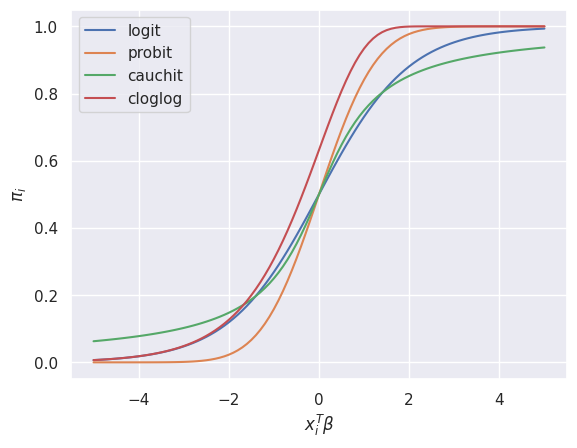

In [73]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
ax.set_xlabel(r'$x_i^T \beta$')
ax.set_ylabel(r'$\pi_i$')
plt.show()

## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [4]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,210.000000,262.000000,262.000000,262,262.000000,64,261,101,28.000000,158,262
unique,NaN,262,2,NaN,NaN,NaN,234,NaN,57,3,21,NaN,127,2
top,NaN,"Isham, Miss. Ann Elizabeth",male,NaN,NaN,NaN,PC 17757,NaN,C22 C26,S,14,NaN,"New York, NY",0
freq,NaN,1,176,NaN,NaN,NaN,3,NaN,2,178,10,NaN,11,162
mean,2.152672,NaN,NaN,30.969841,0.442748,0.320611,NaN,38.019417,NaN,NaN,NaN,175.714286,NaN,NaN
std,0.870753,NaN,NaN,15.847123,0.915263,0.735182,NaN,57.356996,NaN,NaN,NaN,93.011292,NaN,NaN
min,1.000000,NaN,NaN,0.333300,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,32.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,93.250000,NaN,NaN
50%,2.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,17.443750,NaN,NaN,NaN,172.000000,NaN,NaN
75%,3.000000,NaN,NaN,40.000000,1.000000,0.000000,NaN,35.500000,NaN,NaN,NaN,260.750000,NaN,NaN


# Fast and furios solution of the HW from the previous Ex07

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `age`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare` by spliting into 10 groups with approx same number of observations.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

In [5]:
data_HW = titanic_train >> \
  select(titanic_train.survived,titanic_train.age,titanic_train.fare,titanic_train.pclass,titanic_train.sex,
         titanic_train.embarked)

data_HW = data_HW.apply(lambda x: x.astype('category') if str(x.dtype) == 'str' else x) 
print(data_HW.describe(include='all'))
print(data_HW.dtypes)

data_HW = data_HW >> \
            filter_by(data_HW.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_HW.survived.astype('category'),
                      survived_num = data_HW.survived.astype('float'),
                      age = pd.cut(data_HW.age,(-np.inf, 16, np.inf), labels=["child","adult"]),
                      age_num = data_HW.age,
                      fare = data_HW.fare,
                      fare_quantile = pd.qcut(data_HW.fare, q=8, labels=list(range(1, 9))),
                      fare_quantile2 = pd.qcut(data_HW.fare, q=np.linspace(0, 1, 9)),
                      class_ = data_HW.pclass.astype('category'),
                      sex = data_HW.sex.astype('category'),
                      embarked = data_HW.embarked.astype('category')) 


data_HW = data_HW.dropna(axis=0, how='any')  # `axis=0` stands for per index (row)

       

print(data_HW.describe(include='all'))
print(data_HW.info())


       survived         age         fare       pclass   sex embarked
count      1047  836.000000  1046.000000  1047.000000  1047     1046
unique        2         NaN          NaN          NaN     2        3
top           0         NaN          NaN          NaN  male        S
freq        647         NaN          NaN          NaN   667      736
mean        NaN   29.607656    32.112237     2.330468   NaN      NaN
std         NaN   14.027338    50.219089     0.825998   NaN      NaN
min         NaN    0.166700     0.000000     1.000000   NaN      NaN
25%         NaN   21.000000     7.895800     2.000000   NaN      NaN
50%         NaN   28.000000    13.900000     3.000000   NaN      NaN
75%         NaN   38.000000    30.500000     3.000000   NaN      NaN
max         NaN   76.000000   512.329200     3.000000   NaN      NaN
survived    category
age          float64
fare         float64
pclass       float64
sex         category
embarked    category
dtype: object
       survived  survived_num   

In [7]:
#g = sns.pairplot(data=data_HW, vars=list(data_HW.columns))
#g.map_diag(sns.kdeplot)
#g.map_lower(sns.histplot)  TODO needs implementation

In [8]:
# Simple Logistic Regression model with all discrete covariates fare,sex, agewithout interactions
mod_HW1=smf.glm(formula = 'survived_num~age+sex+fare_quantile2', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_HW1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  834
Model:                            GLM   Df Residuals:                      824
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -411.66
Date:                Tue, 06 Sep 2022   Deviance:                       823.31
Time:                        13:30:57   Pearson chi2:                     836.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3044
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       1.1904      0.383      3.105      0.002       0.439       1.942
age[T.adult]                                                   -0.6529      0.257     -2.537      0.011      -1.157      -0.149
sex[T.male]                                                    -2.3926      0.181    -13.232      0.000      -2.747      -2.038
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]        -0.2736      0.425     -0.644      0.519      -1.106       0.559
fare_quantile2[T.Interval(7.896, 9.498, closed='right')]       -0.0496      0.394     -0.126      0.900      -0.822       0.722
fare_quantile2[T.Interval(9.498, 13.9, closed='right')]         0.1195      0.351      0.340      0.734      -0.569       0.808
fare_quantile2[T.Interval(13.9, 22.584, closed='right')]        0.1954      0.372      0.526      0.599      -0.533       0.924
fare_quantile2[T.Interval(22.584, 30.5, closed='right')]        0.9283      0.351      2.648      0.008       0.241       1.615
fare_quantile2[T.Interval(30.5, 67.612, closed='right')]        0.4634      0.354      1.309      0.191      -0.230       1.157
fare_quantile2[T.Interval(67.612, 512.329, closed='right')]     1.4570      0.358      4.068      0.000       0.755       2.159
===============================================================================================================================
"""

In [9]:
#Function to estimate OR with lower and upper limit of 95% CI for OR

def OR_coef(variable,model,CI):
    param = np.array(model.params)
    where = np.where(np.array(model.params.index) == variable)
    beta = param[where]
    se = np.sqrt(np.diag(model.cov_params().to_numpy()))[where]
    or_ = np.exp(beta)
    
    return pd.DataFrame(index=[variable], data={'OR': or_, 'LCL': np.exp(beta-1*scipy.stats.norm.ppf(CI/2 +0.5)*se)
                                              , 'UCL':np.exp(beta+ scipy.stats.norm.ppf(CI/2 +0.5)*se)})
OR_coef("age[T.adult]",mod_HW1,0.95)

,OR,LCL,UCL
age[T.adult],0.520542,0.314365,0.861942


The chances of drowning were almost twice as high in the group of adults as in the group of children. 

In [10]:
# Check model with factorized Fare
mod_HW0=smf.glm(formula = 'survived_num~age+sex', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW1=smf.glm(formula = 'survived_num~age+sex+fare_quantile2', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW2=smf.glm(formula = 'survived_num~age+sex+fare', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  834
Model:                            GLM   Df Residuals:                      824
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -411.66
Date:                Tue, 06 Sep 2022   Deviance:                       823.31
Time:                        13:30:58   Pearson chi2:                     836.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3044
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       1.1904      0.383      3.105      0.002       0.439       1.942
age[T.adult]                                                   -0.6529      0.257     -2.537      0.011      -1.157      -0.149
sex[T.male]                                                    -2.3926      0.181    -13.232      0.000      -2.747      -2.038
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]        -0.2736      0.425     -0.644      0.519      -1.106       0.559
fare_quantile2[T.Interval(7.896, 9.498, closed='right')]       -0.0496      0.394     -0.126      0.900      -0.822       0.722
fare_quantile2[T.Interval(9.498, 13.9, closed='right')]         0.1195      0.351      0.340      0.734      -0.569       0.808
fare_quantile2[T.Interval(13.9, 22.584, closed='right')]        0.1954      0.372      0.526      0.599      -0.533       0.924
fare_quantile2[T.Interval(22.584, 30.5, closed='right')]        0.9283      0.351      2.648      0.008       0.241       1.615
fare_quantile2[T.Interval(30.5, 67.612, closed='right')]        0.4634      0.354      1.309      0.191      -0.230       1.157
fare_quantile2[T.Interval(67.612, 512.329, closed='right')]     1.4570      0.358      4.068      0.000       0.755       2.159
===============================================================================================================================
"""

Yes, covariate `fare` is statisticaly significant in the model. But it's better to test it with Deviation test (LRT) compare to Wald tests from summary() function.

In [11]:
#anova(mod_HW1,mod_HW0,test="Chisq")
chisq(mod_HW0, mod_HW1)
#drop1(mod_HW1,test="Chisq")  # TODO needs implementaion

Estimated Chi2 statistic is: 39.27232030437767 
P-value is: 1.7340354035810648e-06 



Confirmed.

In [12]:
# Fare as continuous variable

mod_HW3 = smf.glm(formula = 'survived_num~np.divide(fare, 10)', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW4 = smf.glm(formula = 'survived_num~np.divide(fare, 10)+sex+age', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_HW4.summary())
print(np.exp(mod_HW3.params))
print(np.exp(mod_HW4.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           survived_num   No. Observations:                  834
Model:                            GLM   Df Residuals:                      830
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -415.69
Date:                Tue, 06 Sep 2022   Deviance:                       831.39
Time:                        13:30:58   Pearson chi2:                     834.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2976
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3138    

The chance of survival increased by 8.5% with the ticket price 10 pounds higher.

Question: What can you say about Causality? Does a higher price result in a greater chance of survival?



In [13]:
# Model without sex variable
mod_HW5 = smf.glm(formula = 'survived_num~np.divide(fare, 10)+np.divide(age_num, 10)', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_HW5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  834
Model:                            GLM   Df Residuals:                      831
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -520.76
Date:                Tue, 06 Sep 2022   Deviance:                       1041.5
Time:                        13:30:58   Pearson chi2:                     846.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09638
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.2232      0.173     -1.287      0.198      -0.563       0.117
np.divide(fare, 10)        0.1618      0.023      7.126      0.000       0.117       0.206
np.divide(age_num, 10)    -0.2381      0.056     -4.232      0.000      -0.348      -0.128
==========================================================================================
"""

## Binomial data approach

In [14]:
#data_HW

In [15]:

data_HW_bin = \
        (data_HW.groupby(by=["sex", "age", "fare_quantile2"], as_index=False)
        .agg(n=('survived_num', 'count'), m=('survived_num', 'sum'))
    
    )

data_HW_bin

,sex,age,fare_quantile2,n,m
0,female,child,"(-0.001, 7.75]",4,4.0
1,female,child,"(7.75, 7.896]",1,0.0
2,female,child,"(7.896, 9.498]",2,2.0
3,female,child,"(9.498, 13.9]",5,3.0
4,female,child,"(13.9, 22.584]",14,11.0
5,female,child,"(22.584, 30.5]",8,7.0
6,female,child,"(30.5, 67.612]",14,8.0
7,female,child,"(67.612, 512.329]",4,3.0
8,female,adult,"(-0.001, 7.75]",17,9.0
9,female,adult,"(7.75, 7.896]",10,4.0


### Some additional questions 

**Estimate** null model and compare obtained probality of survived with estimated probability from survived-not survived ratio.

In [16]:
data_HW_bin['f'] = data_HW_bin['n'] - data_HW_bin['m']
data_HW_bin = sm.add_constant(data_HW_bin)

mod_0 = sm.GLM(endog =data_HW_bin[['m', 'f']], exog=data_HW_bin['const'],
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_0.summary())


def invlogit(x): return np.exp(x) / (1+np.exp(x)) # inverse logit function

p0_model = invlogit(mod_0.params)

# Probability of survive
p0_stat = data_HW_bin['m'].sum()/data_HW_bin['n'].sum()
print(p0_model,p0_stat)

# Chance of survive
print(np.exp(mod_0.params))
p0_stat/(1-p0_stat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['m', 'f']   No. Observations:                   32
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -218.58
Date:                Tue, 06 Sep 2022   Deviance:                       352.17
Time:                        13:30:58   Pearson chi2:                     318.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3835      0.071     -5.438      0.0

0.6814516129032256

Estimate model with one covariate factorized `fare` and compare OR computed directly from estimated regression coefficient with OR compputed from probabilities of survived for each group.

In [17]:
#mod_fare = sm.GLM(endog =data_HW_bin[['m', 'f']], exog=data_HW_bin[['const', 'fare_quantile2']],
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()

#mod_fare = smf.glm('(m,f) ~ fare_quantile2', data=data_HW_bin,
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()

# above are not working
data_HW_bin['p'] = data_HW_bin['m'] / data_HW_bin['n']

mod_fare = smf.glm('p ~ fare_quantile2', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()



print(mod_fare.summary())
#mod_fare.summary()
#anova(mod_fare,mod_0,test="Chisq") 
chisq(mod_0, mod_fare)
# Fare price is highly significant in the model.
print(np.exp(mod_fare.params))




                 Generalized Linear Model Regression Results                  
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -397.06
Date:                Tue, 06 Sep 2022   Deviance:                       262.89
Time:                        13:30:58   Pearson chi2:                     249.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9386
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

Question: Assume you spent 25 pounds for a ticket. What is your chance to survive compare to someone who spent only 5 pounds?

In [18]:
# Compute probability of survival:
print(invlogit(mod_fare.params[0]) )
invlogit(mod_fare.params[0]+mod_fare.params[1:]) 


0.2526315789473713


fare_quantile2[T.Interval(7.75, 7.896, closed='right')]        0.170732
fare_quantile2[T.Interval(7.896, 9.498, closed='right')]       0.235955
fare_quantile2[T.Interval(9.498, 13.9, closed='right')]        0.346457
fare_quantile2[T.Interval(13.9, 22.584, closed='right')]       0.463158
fare_quantile2[T.Interval(22.584, 30.5, closed='right')]       0.495575
fare_quantile2[T.Interval(30.5, 67.612, closed='right')]       0.470085
fare_quantile2[T.Interval(67.612, 512.329, closed='right')]    0.689655
dtype: float64

In [19]:
# Check: odds ratio computed by hands.
Pr_1= invlogit(mod_fare.params[0])
Pr_8 = invlogit(mod_fare.params[0] +mod_fare.params[7])

OR_1 = Pr_1/(1-Pr_1)
OR_8 = Pr_8/(1-Pr_8)
print(OR_8/OR_1)

np.exp(mod_fare.params[-1])

6.574074074074054


6.574074074074054

**Estimate saturated model**

If we have  fixed number of parameters,  saturated model obtain every  "observation" and residual deviance of this saturated model is "zero". 


In [20]:


mod_HW_sat = smf.glm('p ~ fare_quantile2*age*sex', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_HW_sat.summary()

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -265.62
Date:                Tue, 06 Sep 2022   Deviance:                   2.5340e-09
Time:                        13:30:58   Pearson chi2:                 1.27e-09
No. Iterations:                    21   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
========================================================================================================================================================
                                                                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                               22.5661   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]                                -45.1321   5.39e+04     -0.001      0.999   -1.06e+05    1.06e+05
fare_quantile2[T.Interval(7.896, 9.498, closed='right')]                              5.549e-10   4.17e+04   1.33e-14      1.000   -8.18e+04    8.18e+04
fare_quantile2[T.Interval(9.498, 13.9, closed='right')]                                -22.1606   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
fare_quantile2[T.Interval(13.9, 22.584, closed='right')]                               -21.2668   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
fare_quantile2[T.Interval(22.584, 30.5, closed='right')]                               -20.6202   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
fare_quantile2[T.Interval(30.5, 67.612, closed='right')]                               -22.2784   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
fare_quantile2[T.Interval(67.612, 512.329, closed='right')]                            -21.4675   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
age[T.adult]                                                                           -22.4483   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
sex[T.male]                                                                            -22.5661   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]:age[T.adult]                    44.6089   5.39e+04      0.001      0.999   -1.06e+05    1.06e+05
fare_quantile2[T.Interval(7.896, 9.498, closed='right')]:age[T.adult]                   -0.3691   4.17e+04  -8.84e-06      1.000   -8.18e+04    8.18e+04
fare_quantile2[T.Interval(9.498, 13.9, closed='right')]:age[T.adult]                    22.9591   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
fare_quantile2[T.Interval(13.9, 22.584, closed='right')]:age[T.adult]                   21.6010   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
fare_quantile2[T.Interval(22.584, 30.5, closed='right')]:age[T.adult]                   22.2251   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
fare_quantile2[T.Interval(30.5, 67.612, closed='right')]:age[T.adult]                   23.8654   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
fare_quantile2[T.Interval(67.612, 512.329, closed='right')]:age[T.adult]                24.7837   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
fare_quantile2[T.Interv


We can test other models against saturated one.

In [21]:


mod_HW_bin1 = smf.glm('p ~ fare_quantile2+age+sex', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_HW_bin1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                       22
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -290.33
Date:                Tue, 06 Sep 2022   Deviance:                       49.423
Time:                        13:30:58   Pearson chi2:                     50.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       1.1904      0.383      3.105      0.002       0.439       1.942
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]        -0.2736      0.425     -0.644      0.519      -1.106       0.559
fare_quantile2[T.Interval(7.896, 9.498, closed='right')]       -0.0496      0.394     -0.126      0.900      -0.822       0.722
fare_quantile2[T.Interval(9.498, 13.9, closed='right')]         0.1195      0.351      0.340      0.734      -0.569       0.808
fare_quantile2[T.Interval(13.9, 22.584, closed='right')]        0.1954      0.372      0.526      0.599      -0.533       0.924
fare_quantile2[T.Interval(22.584, 30.5, closed='right')]        0.9283      0.351      2.648      0.008       0.241       1.615
fare_quantile2[T.Interval(30.5, 67.612, closed='right')]        0.4634      0.354      1.309      0.191      -0.230       1.157
fare_quantile2[T.Interval(67.612, 512.329, closed='right')]     1.4570      0.358      4.068      0.000       0.755       2.159
age[T.adult]                                                   -0.6529      0.257     -2.537      0.011      -1.157      -0.149
sex[T.male]                                                    -2.3926      0.181    -13.232      0.000      -2.747      -2.038
===============================================================================================================================
"""

In [22]:
#drop1(mod_HW_sat, test="Chisq")
#anova(mod_HW_sat,mod_HW_bin1, test="Chisq")
chisq(mod_HW_bin1, mod_HW_sat)


Estimated Chi2 statistic is: 49.4228455655008 
P-value is: 0.0007014294871186032 



## Question:
* How do you interpret previous result?
* Is simplier aditive model without interactions good enough?

## Residual analysis

In [23]:
# start with simple model


mod_1 = smf.glm('survived_num ~ age_num+sex+class_', data=data_HW, 
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_1.summary()

#mod_1 = smf.glm('survived_num ~dare+sex+', data=data_HW_bin, 
#              family=sm.families.Binomial(sm.families.links.Logit())).fit()
#mod_1.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  834
Model:                            GLM   Df Residuals:                      829
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.95
Date:                Tue, 06 Sep 2022   Deviance:                       769.90
Time:                        13:30:58   Pearson chi2:                     880.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3476
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8119      0.387      9.846      0.000       3.053       4.571
sex[T.male]      -2.5371      0.188    -13.490      0.000      -2.906      -2.168
class_[T.2.0]    -1.3896      0.263     -5.291      0.000      -1.904      -0.875
class_[T.3.0]    -2.3906      0.261     -9.168      0.000      -2.902      -1.880
age_num          -0.0405      0.007     -5.449      0.000      -0.055      -0.026
=================================================================================
"""

In [24]:
res_resp = mod_1.resid_response 
res_work = mod_1.resid_working 
res_pear = mod_1.resid_pearson 
res_deviance = mod_1.resid_deviance

#print(res_resp,res_work,res_pear, res_deviance)

A perfect fit of a datapoint (which never occurs) gives a deviance of zero as "log(1) =0". A poorly fitting point has a large residual deviance.

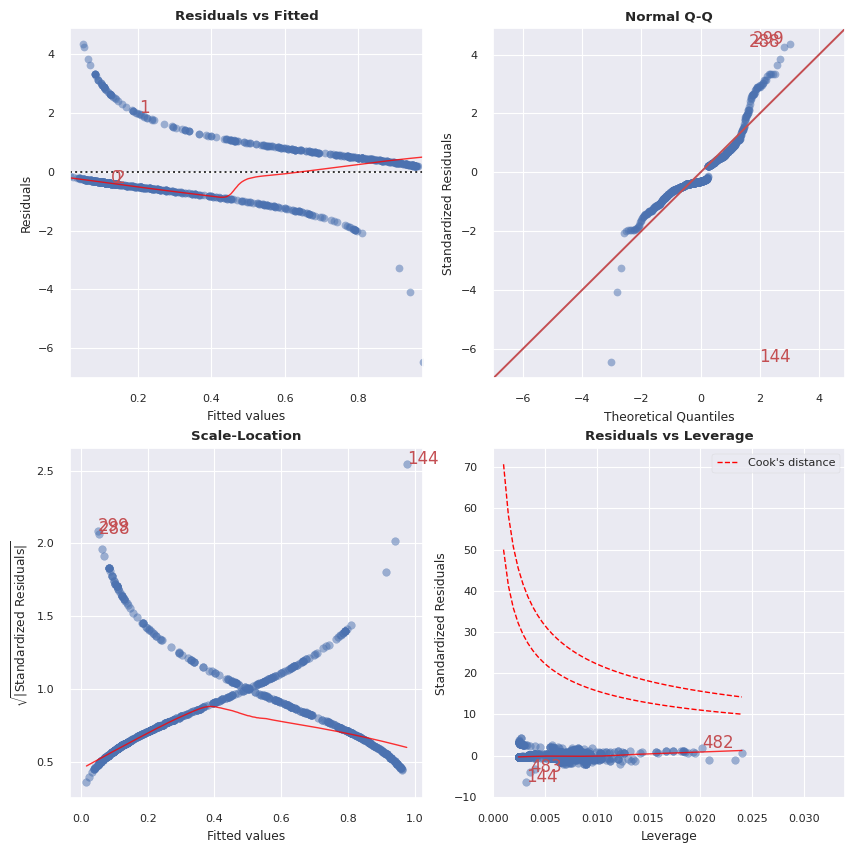

        Features  VIF Factor
1    sex[T.male]        1.05
4        age_num        1.23
2  class_[T.2.0]        1.59
3  class_[T.3.0]        1.84
0      Intercept       13.60


In [74]:
cls = DiagnosticPlots(mod_1)
fig, ax = cls()
plt.show()

All plots look funny. What do you think, is there any problem in the model?


* The **Residuals vs Fitted** plot can help you see, for example, if there are curvilinear trends that you missed. But the fit of a logistic regression is curvilinear by nature, so you can have odd looking trends in the residuals with nothing amiss.
* The **Normal Q-Q** plot helps you detect if your residuals are normally distributed. But the deviance residuals don't have to be normally distributed for the model to be valid, so the normality / non-normality of the residuals doesn't necessarily tell you anything.
* The **Scale-Location** plot can help you identify heteroscedasticity. But logistic regression models are pretty much heteroscedastic by nature.
* The **Residuals vs Leverage** can help you identify possible outliers. But outliers in logistic regression don't necessarily manifest in the same way as in linear regression, so this plot may or may not be helpful in identifying them.

source:https://stats.stackexchange.com/questions/121490/interpretation-of-plot-glm-model


<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

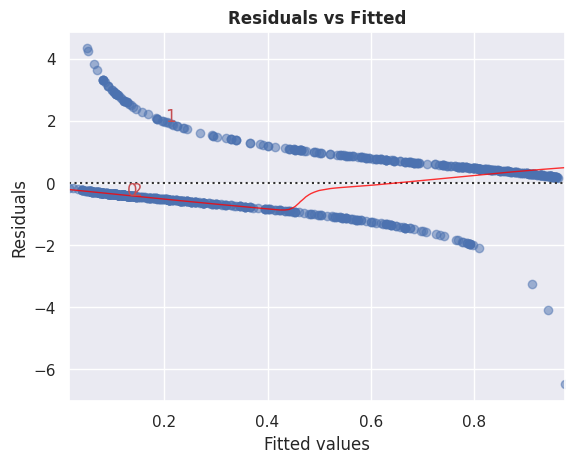

In [75]:
cls.residual_plot()

In [27]:
plot(data_HW$age_num,residuals(mod_1),col=c("blue","red")[1+data_HW$survived_num])
lines(lowess(data_HW$age_num,residuals(mod_1)),col="black",lwd=2)
lines(lowess(data_HW$age_num[data_HW$survived_num==0],residuals(mod_1)[data_HW$survived_num==0]),col="blue")
lines(lowess(data_HW$age_num[data_HW$survived_num==1],residuals(mod_1)[data_HW$survived_num==1]),col="red")
abline(h=0,lty=2,col="grey")

SyntaxError: invalid syntax (663139145.py, line 1)

/tmp/ipykernel_5724/216991059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['resid'] = mod_1.resid_deviance


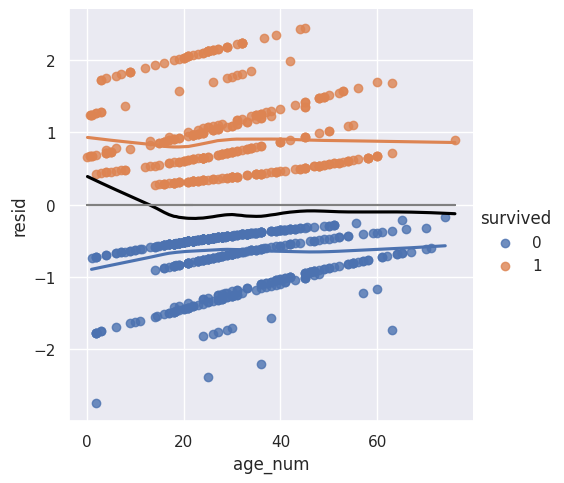

In [61]:
d = data_HW[['age_num', 'survived']]
d['resid'] = mod_1.resid_deviance


sns.lmplot(x='age_num', y='resid', data=d, hue='survived', lowess=True)
sns.regplot(x='age_num', y='resid', data=d, lowess=True, color='black', marker='')
plt.plot(d['age_num'], np.zeros((len(d['age_num']),)), color='grey')

In [69]:
data_HW_mod = data_HW >> \
        mutate(fitted=mod_1.fittedvalues,
               predict = np.where(mod_1.fittedvalues.to_numpy() > 0.5, '1', '0'),
               r_deviance_std = mod_1.resid_deviance,  # standardized by default
               r_pearson_std = mod_1.resid_pearson  # standardized by default
              )
data_HW_mod['predict'] = data_HW_mod['predict'].astype('category') 
data_HW_mod.head()

,survived,survived_num,age,age_num,fare,fare_quantile,fare_quantile2,class_,sex,embarked,fitted,predict,r_deviance_std,r_pearson_std
633,0,0.0,adult,20.0,7.8542,2,"(7.75, 7.896]",3.0,male,S,0.127107,0,-0.521425,-0.381596
596,1,1.0,adult,31.0,13.0000,4,"(9.498, 13.9]",2.0,male,S,0.202325,0,1.787669,1.985585
1288,0,0.0,adult,18.0,6.4958,1,"(-0.001, 7.75]",3.0,male,S,0.136380,0,-0.541521,-0.397387
1223,1,1.0,adult,23.0,7.5500,1,"(-0.001, 7.75]",3.0,female,S,0.619795,1,0.978128,0.783222
49,1,1.0,adult,36.0,512.3292,8,"(67.612, 512.329]",1.0,male,C,0.453898,0,1.256888,1.096877


<AxesSubplot:xlabel='age_num', ylabel='r_deviance_std'>

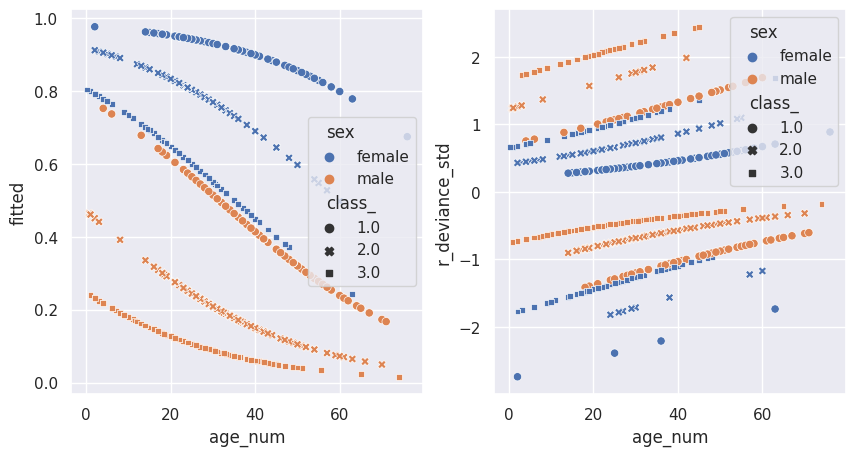

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='age_num', y='fitted', data=data_HW_mod, hue='sex', style='class_', ax=ax[0])
sns.scatterplot(x='age_num', y='r_deviance_std', data=data_HW_mod, hue='sex', style='class_', ax=ax[1])
plt.show()

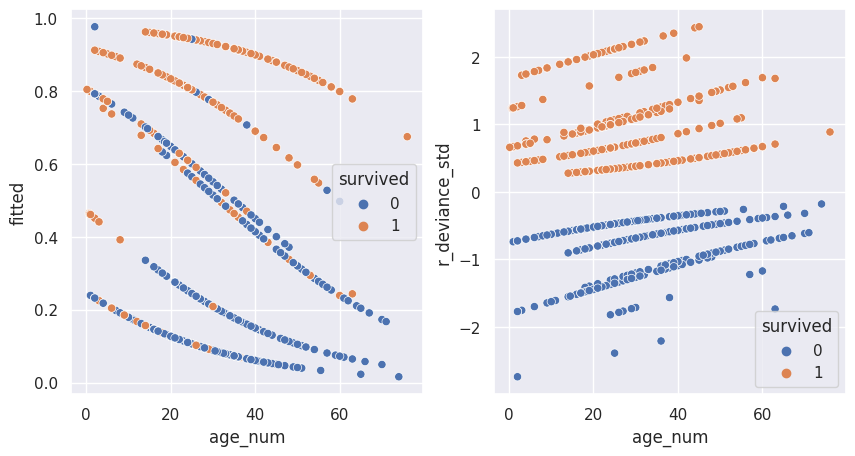

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='age_num', y='fitted', data=data_HW_mod, hue='survived', ax=ax[0])
sns.scatterplot(x='age_num', y='r_deviance_std', data=data_HW_mod, hue='survived', ax=ax[1])
plt.show()

## Post hoc analysis by quality of fitted values

In [88]:
# Fit a  model
pd.crosstab([data_HW_mod.predict],[data_HW.survived])

survived,0,1
predict,,
0,420,97
1,76,241


In [94]:
print(confusion_matrix(y_true=data_HW_mod.survived, y_pred=data_HW_mod.predict))
print(classification_report(y_true=data_HW_mod.survived, y_pred=data_HW_mod.predict))

[[420  76]
 [ 97 241]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       496
           1       0.76      0.71      0.74       338

    accuracy                           0.79       834
   macro avg       0.79      0.78      0.78       834
weighted avg       0.79      0.79      0.79       834



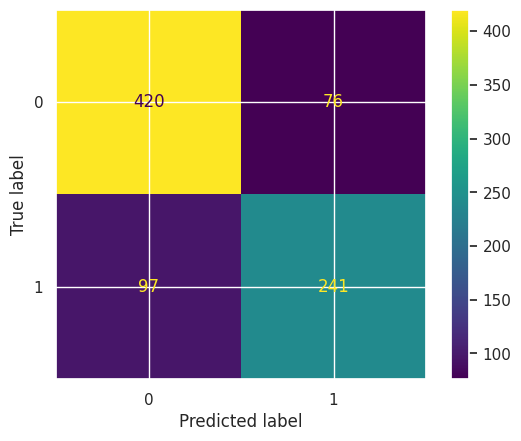

In [93]:
ConfusionMatrixDisplay.from_predictions(data_HW_mod.survived, data_HW_mod.predict)
plt.show()

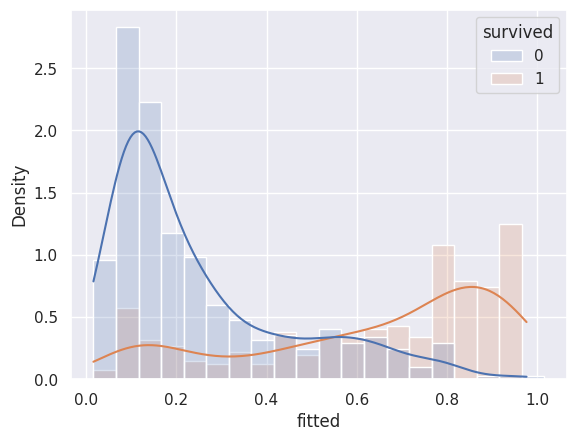

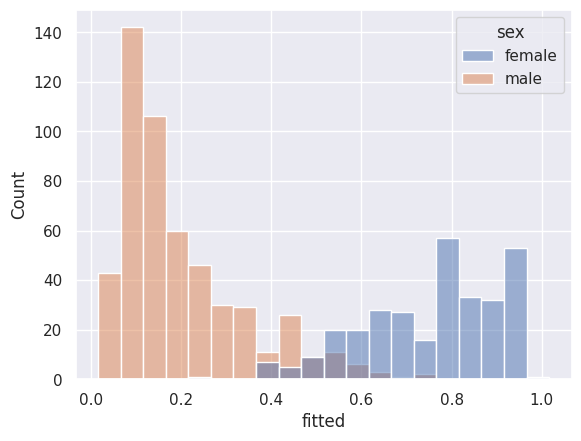

In [109]:
sns.histplot(data=data_HW_mod, x='fitted', hue='survived', alpha=0.2, fill=True, stat='density', kde=True,
            binwidth=0.05)
plt.show()

sns.histplot(data=data_HW_mod, x='fitted', hue='sex', alpha=0.5, fill=True, stat='count', binwidth=0.05)
plt.show()

In [ ]:
data_HW_mod = data_HW_mod %>%
  mutate(predict_04 = as.factor(ifelse(fitted > 0.4, "1", "0")) )
head(data_HW_mod)
confusionMatrix(data_HW_mod$predict_04, data_HW_mod$survived, positive = "1")

In [110]:
data_HW_mod = data_HW_mod >> \
        mutate(
               predict_04 = np.where(mod_1.fittedvalues.to_numpy() > 0.4, '1', '0'),
              )
data_HW_mod['predict'] = data_HW_mod['predict'].astype('category') 

print(data_HW_mod.head())
print(print(confusion_matrix(y_true=data_HW_mod.survived, y_pred=data_HW_mod.predict_04)))

     survived  survived_num    age  age_num      fare fare_quantile  \
633         0           0.0  adult     20.0    7.8542             2   
596         1           1.0  adult     31.0   13.0000             4   
1288        0           0.0  adult     18.0    6.4958             1   
1223        1           1.0  adult     23.0    7.5500             1   
49          1           1.0  adult     36.0  512.3292             8   

         fare_quantile2 class_     sex embarked    fitted predict  \
633       (7.75, 7.896]    3.0    male        S  0.127107       0   
596       (9.498, 13.9]    2.0    male        S  0.202325       0   
1288     (-0.001, 7.75]    3.0    male        S  0.136380       0   
1223     (-0.001, 7.75]    3.0  female        S  0.619795       1   
49    (67.612, 512.329]    1.0    male        C  0.453898       0   

      r_deviance_std  r_pearson_std predict_04  
633        -0.521425      -0.381596          0  
596         1.787669       1.985585          0  
1288       

In [111]:
(392+265)/(392 + 265 + 104+ 73 ) # Accuracy from Confusion Matrix

0.7877697841726619

## Use test data

In [112]:
titanic_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
169,1.0,"Isham, Miss. Ann Elizabeth",female,50.0,0.0,0.0,PC 17595,28.7125,C49,C,None,NaN,"Paris, France New York, NY",0
379,2.0,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1.0,1.0,C.A. 31921,26.2500,None,S,14,NaN,"Bishopstoke, Hants / Fayette Valley, ID",1
826,3.0,"Goodwin, Master. Sidney Leonard",male,1.0,5.0,2.0,CA 2144,46.9000,None,S,None,NaN,"Wiltshire, England Niagara Falls, NY",0
1199,3.0,"Shorney, Mr. Charles Joseph",male,NaN,0.0,0.0,374910,8.0500,None,S,None,NaN,None,0
836,3.0,"Gustafsson, Mr. Alfred Ossian",male,20.0,0.0,0.0,7534,9.8458,None,S,None,NaN,"Waukegan, Chicago, IL",0


In [136]:
data_test = titanic_test[['age', 'sex', 'pclass', 'fare', 'embarked']] >> \
            filter_by(titanic_test.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = titanic_test.survived,
                      survived_num = titanic_test.survived.astype('float'),
                      age = pd.cut(titanic_test.age,(-np.inf, 16, np.inf), labels=["child","adult"]),
                      age_num = titanic_test.age,
                      fare = titanic_test.fare,
                      fare_quantile = pd.qcut(titanic_test.fare, q=8, labels=list(range(1, 9))),
                      fare_quantile2 = pd.qcut(titanic_test.fare, q=np.linspace(0, 1, 9)),
                      class_ = titanic_test.pclass.astype('category'),
                      sex = titanic_test.sex.astype('category'),
                      embarked = titanic_test.embarked.astype('category')) 

data_test = data_test.dropna(axis=0, how='any')  # `axis=0` stands for per index (row)
print(data_test.describe(include='all'))
print(data_test.info())
#data_test.head()

       survived  survived_num    age     age_num        fare  fare_quantile  \
count       209    209.000000    209  209.000000  209.000000          209.0   
unique        2           NaN      2         NaN         NaN            8.0   
top           0           NaN  adult         NaN         NaN            4.0   
freq        122           NaN    181         NaN         NaN           29.0   
mean        NaN      0.416268    NaN   30.821372   41.764852            NaN   
std         NaN      0.494123    NaN   15.738086   62.675853            NaN   
min         NaN      0.000000    NaN    0.333300    6.237500            NaN   
25%         NaN      0.000000    NaN   21.000000    9.350000            NaN   
50%         NaN      0.000000    NaN   30.000000   20.250000            NaN   
75%         NaN      1.000000    NaN   40.000000   39.687500            NaN   
max         NaN      1.000000    NaN   80.000000  512.329200            NaN   

          fare_quantile2  class_   sex embarked  
c

In [135]:
data_test

,survived_num,age,age_num,fare,fare_quantile,fare_quantile2,class_,sex,embarked,fitted,predict
747,0.0,child,0.3333,14.4000,4,"(12.809, 17.444]",3.0,male,S,0.244286,0
1240,1.0,child,0.4167,8.5167,3,"(8.05, 12.809]",3.0,male,C,0.243662,0
1111,0.0,child,0.7500,13.7750,4,"(12.809, 17.444]",3.0,male,S,0.241180,0
611,1.0,child,0.8333,9.3500,3,"(8.05, 12.809]",3.0,male,S,0.240562,0
590,1.0,child,0.9167,27.7500,6,"(26.031, 35.5]",2.0,female,S,0.915686,1
...,...,...,...,...,...,...,...,...,...,...,...
217,0.0,adult,64.0000,26.0000,5,"(17.444, 26.031]",1.0,male,S,0.210768,0
78,1.0,adult,64.0000,83.1583,8,"(76.456, 512.329]",1.0,female,C,0.771501,1
727,0.0,adult,70.5000,7.7500,1,"(-0.001, 7.75]",3.0,male,Q,0.018442,0
135,0.0,adult,71.0000,34.6542,6,"(26.031, 35.5]",1.0,male,C,0.167403,0


     survived  survived_num    age  age_num     fare fare_quantile  \
747         0           0.0  child   0.3333  14.4000             4   
1240        1           1.0  child   0.4167   8.5167             3   
1111        0           0.0  child   0.7500  13.7750             4   
611         1           1.0  child   0.8333   9.3500             3   
590         1           1.0  child   0.9167  27.7500             6   

        fare_quantile2 class_     sex embarked    fitted predict  
747   (12.809, 17.444]    3.0    male        S  0.244286       0  
1240    (8.05, 12.809]    3.0    male        C  0.243662       0  
1111  (12.809, 17.444]    3.0    male        S  0.241180       0  
611     (8.05, 12.809]    3.0    male        S  0.240562       0  
590     (26.031, 35.5]    2.0  female        S  0.915686       1  


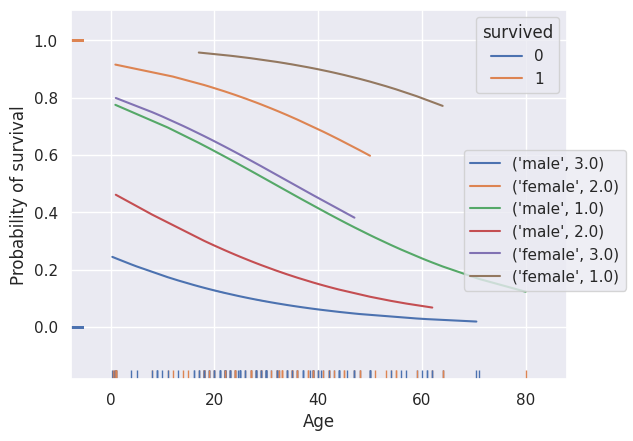

In [148]:
data_test = data_test >> \
        mutate(fitted=mod_1.predict(exog = data_test, linear=False),
               predict = np.where(mod_1.predict(exog = data_test, linear=False).to_numpy() > 0.5, '1', '0') 
              ) >> \
        arrange(data_test.age_num)

data_test['predict'] = data_test['predict'].astype('category') 
print(data_test.head())

fig, ax = plt.subplots()
sns.lineplot(data=data_test, x='age_num', y='fitted', hue=data_test[['sex', 'class_']].apply(tuple, axis=1), ax=ax)
sns.rugplot(data=data_test, x='age_num', y='survived_num', hue='survived', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Probability of survival')
fig.legend(loc='center right')


plt.show()

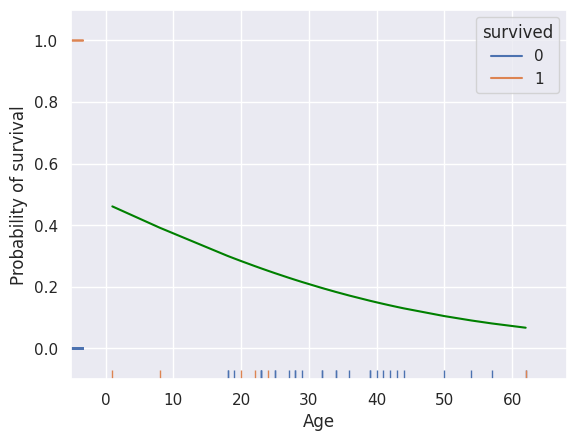

In [159]:
data_test_select = data_test[(data_test.sex == 'male') & (data_test.class_ == 2)]

fig, ax = plt.subplots()
sns.lineplot(data=data_test_select, x='age_num', y='fitted', ax=ax, color='green')
sns.rugplot(data=data_test_select, x='age_num', y='survived_num', hue='survived', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Probability of survival')



plt.show()

Wrong way to plot confidence interval

In [ ]:
## add standard errors and compute a 95% interval the wrong way

# unfortunately there is not such parameter to calculate `se.fit` so we need perform calculation by hand

se_fit = []
for _, row in data_test_select[['age_num']].iterrows():
    vec = np.array([1, 1, 1, 0, row['age_num']])
    se_fit.append(np.sqrt(vec @ model_1.cov_params().to_numpy() @ vec.T))
se_fit = np.array(se_fit)

# not sure it it is correct
se_fit = np.sqrt(mod_1.model.family.variance(mod_1.predict(data_test_select, linear=False)))

data_test_select = data_test_select >> \
  mutate(wrong_se = se_fit, #se_fit,
         wrong_upr = data_test_select.fitted + (2 * se_fit),
         wrong_lwr = data_test_select.fitted - (2 * se_fit))

plt + geom_ribbon(data = data_test_select, aes(ymin = wrong_lwr, ymax = wrong_upr),
                  alpha = 0.1)

fig, ax = plt.subplots()
sns.lineplot(data=data_test_select, x='age_num', y='fitted', ax=ax, color='green', 
             errorbar=lambda x: data_test_select)
sns.rugplot(data=data_test_select, x='age_num', y='survived_num', hue='survived', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Probability of survival')



plt.show()


# TODO this is not working

In [246]:
import copy
mod_copy = copy.deepcopy(mod_1)
mod_copy.model.exog = mod_1.model.exog[:, 0][:, None]
mod23 = mod_copy.model.fit()

In [245]:
mod_1.mu

array([0.12710668, 0.20232482, 0.13637986, 0.61979482, 0.45389758,
       0.16587895, 0.91310701, 0.81154809, 0.20894802, 0.2226689 ,
       0.93562965, 0.18340093, 0.07915223, 0.47014668, 0.25971773,
       0.13969031, 0.78362714, 0.08120416, 0.84597748, 0.59074133,
       0.6005074 , 0.23702082, 0.76956072, 0.95942387, 0.90645324,
       0.45389758, 0.18531429, 0.11017233, 0.09351506, 0.84979162,
       0.62930264, 0.1183776 , 0.46396606, 0.20232482, 0.20894802,
       0.54488008, 0.57484616, 0.2519979 , 0.66628312, 0.96097334,
       0.79042334, 0.76956072, 0.77667283, 0.81154809, 0.86594711,
       0.13167403, 0.12267537, 0.78577685, 0.77667283, 0.0918105 ,
       0.18955185, 0.68406565, 0.25971773, 0.20438619, 0.82945184,
       0.54788057, 0.32914158, 0.08848498, 0.27561093, 0.50052278,
       0.48025861, 0.08215861, 0.94881949, 0.09880008, 0.06940645,
       0.0563134 , 0.10130534, 0.61679178, 0.64801471, 0.09524794,
       0.22487911, 0.18340093, 0.01604118, 0.33815629, 0.11017

In [249]:

mod23.de

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

Right way  \TODO all bellow is pending\

In [219]:
#predict(mod_1, data_test_select, se.fit = TRUE)
np.sqrt(mod_1.model.family.variance(mod_1.predict(data_test_select, linear=False)))

492    0.498495
385    0.488181
326    0.458496
394    0.458496
530    0.454725
520    0.450831
523    0.442702
571    0.438480
403    0.438480
525    0.438480
376    0.434160
565    0.429750
480    0.429750
507    0.420682
527    0.416038
519    0.416038
391    0.411327
443    0.396861
498    0.396861
414    0.386995
466    0.386995
543    0.377003
504    0.361866
509    0.361866
406    0.356801
532    0.351732
347    0.346665
435    0.341604
429    0.336552
488    0.306627
508    0.287260
472    0.273148
511    0.250550
432    0.250550
dtype: float64

In [ ]:
ilink = family(mod_1)$linkinv
quant_t = qt(0.025, df = df.residual(mod_1), lower.tail = FALSE)
quant_n = qnorm(0.005, lower.tail = FALSE)
## add fit and se.fit on the **link** scale
data_test_select = data_test_select %>%
   mutate(fit_link = predict(mod_1, data_test_select, se.fit = TRUE)$fit,
          se_link  = predict(mod_1, data_test_select, se.fit = TRUE)$se.fit,
          fit  = ilink(fit_link),
          fit_ul = ilink(fit_link + (quant_n * se_link)),
          fit_ll = ilink(fit_link - (quant_n * se_link)))
## show
head(data_test_select)

plt + geom_ribbon(data = data_test_select,
                  aes(ymin = fit_ll, ymax = fit_ul),
                  alpha = 0.1)



Binary classification

https://en.wikipedia.org/wiki/Binary_classification

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

https://en.wikipedia.org/wiki/Receiver_operating_characteristic



In R many different packages:  /TODO prepare for Python/

https://rviews.rstudio.com/2019/03/01/some-r-packages-for-roc-curves/

https://cran.r-project.org/web/packages/ROCit/index.html

https://cran.r-project.org/web/packages/pROC/index.html

https://cran.r-project.org/web/packages/ROCR/

In [ ]:
install.packages("pROC")
library(pROC)

Intro with pROC: https://rpubs.com/Wangzf/pROC

In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         #partial.auc=c(100, 90), 
         #partial.auc.correct=True,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         #print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         #print.auc.col = "#1c61b6",
         #auc.polygon = TRUE, 
         #auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         #max.auc.polygon = TRUE, 
         #max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")



In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         partial.auc=c(100, 90), 
         partial.auc.correct=TRUE,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         print.auc.col = "#1c61b6",
         auc.polygon = TRUE, 
         auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,
         percent = TRUE, 
         add = TRUE, 
         type = "n",                        # add to plot, but don't re-add the ROC itself (useless)
         partial.auc = c(100, 90), 
         partial.auc.correct = TRUE,
         partial.auc.focus = "se",          # focus pAUC on the sensitivity
         print.auc = TRUE, 
         print.auc.pattern = "Corrected pAUC (100-90%% SE):\n%.1f%%", 
         print.auc.col = "#008600",
         print.auc.y = 40,                  # do not print auc over the previous one
         auc.polygon = TRUE, 
         auc.polygon.col = "#008600",
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#00860022")

In [ ]:
install.packages("ROCR")
library(ROCR)
pr = prediction(data_HW_mod$fitted, data_HW_mod$survived)
prf = performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)
#? performance
auc = performance(pr, measure = "auc")
auc = auc@y.values[[1]]
auc

## Your Turn :

* Compute a new variable `nrelatives = sibsp + parch`
* Fit model with this new variable (you can try use it as continuous or as factor (change levels)) and `sex, age, fare, class, embarked`
* Try to use `step` function to find the "best" model.
* Validate the model. Are all variables significant? If you have any numerical variable, does it need any transformation?
* Plot densities of fitted probabilities for survived/not survived and choose optimal threshold.
* Compute the confusion matrix and basic statistics and compare results of your model with model mod_1
* Plot ROC curve of your model together with ROC curve of mod_1. Which one has larger AUC.